# Some pandas basics
Let's import pandas, then start with the most basic pandas data structure, the pandas Series, which is very similar to a dictionary.  
The other main datastructure is a DataFrame, which is essentially a table, or a mult-object array with associated column and index labels.  
Btw the docs on this library are fantastic: http://pandas.pydata.org/pandas-docs/stable/

In [416]:
import pandas as pd

ser = pd.Series({'a': 1,
                 'b': 2,
                 'c': 3,
                 'd': 4})
ser

a    1
b    2
c    3
d    4
dtype: int64

In [417]:
# Let's make a new series that's just the old one with the values multiplied by 3. 
ser2 = ser*3
ser2

a     3
b     6
c     9
d    12
dtype: int64

In [418]:
# For most cases you can assume pandas makes a deep copy:
ser2_copy = ser2
ser2_copy = ser2_copy*10
ser2_copy

a     30
b     60
c     90
d    120
dtype: int64

In [419]:
# So the original remains unaffected:
ser2

a     3
b     6
c     9
d    12
dtype: int64

A difference between a pandas Series and a Dictionary though is that the index or keys can be hashable in a Series but not in a Dictionary. For example:

In [420]:
# Bueno
test_ser = pd.Series(index=[['a','b'],['c','d']], data=[1,2])
test_ser

a  c    1
b  d    2
dtype: int64

In [421]:
# No bueno (can't use a list as a dict key, only immutable objects)
# Uncomment below to demo error:


#test_dic = {['a','b']: 1, ['c','d']: 2}
#test_dic

In [422]:
# Let's go back and give our series a name...
ser.name = 'col_1'
ser

a    1
b    2
c    3
d    4
Name: col_1, dtype: int64

In [423]:
# let's convert that previous series we had to a 1D dataframe.
df = ser.to_frame()
df 
# you can see that the series name becomes the column name within the dataframe

,col_1
a,1
b,2
c,3
d,4


In [424]:
# we can append another series to this dataframe now to make it multi-column:
df['col_2'] = ser2
df

,col_1,col_2
a,1,3
b,2,6
c,3,9
d,4,12


We can also append (or edit) a row using the .loc method, referencing the index.

In [425]:
df.loc['e'] = [5, 15]
df

,col_1,col_2
a,1,3
b,2,6
c,3,9
d,4,12
e,5,15


In [426]:
df.loc['b'] = df.loc['b']/2
df

,col_1,col_2
a,1.0,3.0
b,1.0,3.0
c,3.0,9.0
d,4.0,12.0
e,5.0,15.0


Oops that changed it from int to float, let's bring it back to int.

In [427]:
df = df.astype(int)
df

,col_1,col_2
a,1,3
b,1,3
c,3,9
d,4,12
e,5,15


So you ref the column name df['column_name'] to edit / add a column.
You use the .loc method for rows.

there's also the .iloc method which ignores the index/column names and treats it like a grid.

Now let's edit one of the columns, but instead of using the column name, let's use iloc.

In [428]:
# iloc works like .iloc[rows, columns]. So 
df.iloc[0,0]

1

In [429]:
# or the middle section of the df
df.iloc[1:4,:]
# rows 1 to 4, and all the cols
# we're just returning a slice of the df, not actually changing the original df.

,col_1,col_2
b,1,3
c,3,9
d,4,12


Let's multiply col_2 based on its index position [0,1,2,3,4], kinda matrix multiplication, but let's actually mutate the df.

In [430]:
df.iloc[:,1] = df.iloc[:,1]*list(range(len(df)))
df

,col_1,col_2
a,1,0
b,1,3
c,3,18
d,4,36
e,5,60


We can do similar with .loc method, just using our row/col names:

In [431]:
df.loc['d','col_2']

36

In [432]:
df.loc['c','col_2'] = "Red red wine"
df

,col_1,col_2
a,1,0
b,1,3
c,3,Red red wine
d,4,36
e,5,60


In pandas there are numerous ways to do the same thing, it depends how verbose/readable vs. how efficient you want it to be. Some examples:

In [433]:
# let's make a new version of our df in several different ways. 
# First is the most verbose, you overwrite the dataframe for each step:

df2 = df # Make a copy of the df
df2 = df2.rename(columns={"col_1":"col_b", "col_2":"col_a"}) # Rename the column names according to this dic
df2 = df2.replace(regex={"wine": "blood".upper()}) # Replace any occurance of one substring with another
df2 = df2.iloc[::-1] # This says: all rows, in reverse order. 
df2 = df2.replace(1, np.nan) # Replace any occurance of 1 with a NaN
df2 = df2.dropna() # drop any rows with a NaN value in it
df2 = df2.reset_index() # Reset the index so it becomes a regular column (and a new numeric index is made)
df2 = df2.rename(columns={"index":"alphabet"}) # Rename this new index column something else
df2 = df2.set_index("col_a") # Set col_a as the new index (deletes numeric index)


# Another method is to put in the argument "inplace=True", does exactly the same
df3 = df.iloc[::-1]
df3.rename(columns={"col_1":"col_b", "col_2":"col_a"}, inplace=True)
df3.replace(regex={"wine": "blood".upper()}, inplace=True)
df3.replace(1, np.nan, inplace=True)
df3.dropna(inplace=True)
df3.reset_index(inplace=True)
df3.rename(columns={"index":"alphabet"}, inplace=True)
df3.set_index("col_a", inplace=True)


# Or lastly you can cascade these methods putting it all in one line!
# as long as you know each one acts on the result of the object that came before:
df4 = df.rename(columns={"col_1":"col_b", "col_2":"col_a"})\
        .replace(regex={"wine": "blood".upper()})\
        .iloc[::-1]\
        .replace(1, np.nan).dropna().reset_index()\
        .rename(columns={"index":"alphabet"}).set_index("col_a")

# Demo that the result is all the same:
display(df2)
display(df3)
display(df4)


,alphabet,col_b
col_a,,
60,e,5.0
36,d,4.0
Red red BLOOD,c,3.0


,alphabet,col_b
col_a,,
60,e,5.0
36,d,4.0
Red red BLOOD,c,3.0


,alphabet,col_b
col_a,,
60,e,5.0
36,d,4.0
Red red BLOOD,c,3.0


# Start from scratch, making a dataframe:
Let's start afresh and make a DataFrame from scratch though.

Start with a list of lists.

The index and columns are auto generated.

In [434]:
test_data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
df = pd.DataFrame(data=test_data)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


But the index and columns can also be assigned. 
More basic info on the ways to create a DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [435]:
test_cols = ['a', 'b', 'c']
test_index = [101, 102, 103]
df = pd.DataFrame(data=test_data, columns=test_cols, index=test_index)
df

,a,b,c
101,1,2,3
102,4,5,6
103,7,8,9


### Adding data
We can also add columns just like adding to dictionaries:

In [436]:
df['d'] = [10,11,12]
df

,a,b,c,d
101,1,2,3,10
102,4,5,6,11
103,7,8,9,12


In [437]:
df['e'] = (df['c']**2/df['b']**2 +3)*3
df

,a,b,c,d,e
101,1,2,3,10,15.750000
102,4,5,6,11,13.320000
103,7,8,9,12,12.796875


### Doing fancy things with the data:
Once we have a dataframe, the possibilities are pretty much endless, it's just learning what we can do, for example: statistics

In [438]:
df.describe()

,a,b,c,d,e
count,3.0,3.0,3.0,3.0,3.000000
mean,4.0,5.0,6.0,11.0,13.955625
std,3.0,3.0,3.0,1.0,1.575833
min,1.0,2.0,3.0,10.0,12.796875
25%,2.5,3.5,4.5,10.5,13.058438
50%,4.0,5.0,6.0,11.0,13.320000
75%,5.5,6.5,7.5,11.5,14.535000
max,7.0,8.0,9.0,12.0,15.750000


#### Or we can plot:
FYI this functionality piggybacks entirely on matplotlib library, and is just shorthand... in order to do anything at all bespoke you should use matplotlib, which can be a little.... verbose.

Here's a quick overview of what's available in this pandas shorthand though in terms of plotting:  
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting  
I'll also throw a few examples here:

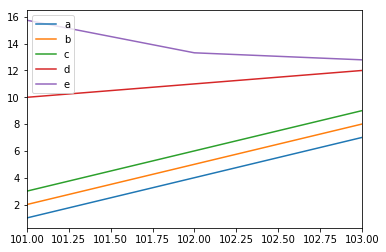

In [439]:
df.plot()

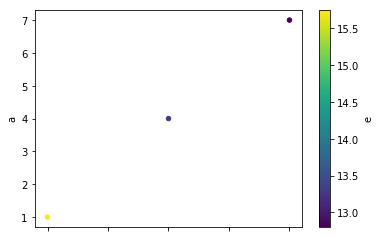

In [440]:
# Or make a scatter plot of "a" against the index (have to reset the index to access it in this case)
# And make a "third" axis in colour with column "e"
df.reset_index().plot.scatter(x='index', 
                              y='a', 
                              c='e', 
                              colormap='viridis')

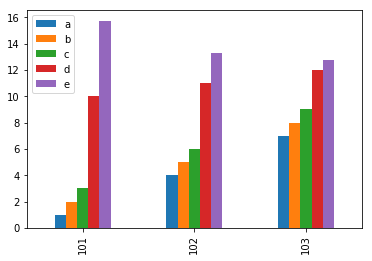

In [441]:
df.plot.bar()

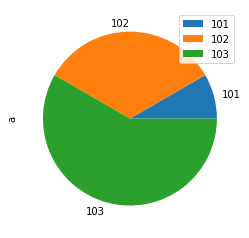

In [447]:
# Pie chart:
df.plot.pie(['a'])

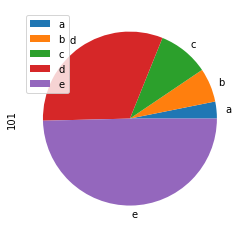

In [446]:
# Lets take a transposed dataframe with df.T (just switches index for column and vice versa) 
# and instead plot all the values at x = 101
df.T.plot.pie([101])

### Timeseries
For me the beautiful integration of timeseries functionality is one of the most useful things about pandas:

In [338]:
# Make a date range, starting now, ending one day from now, with three equally spaced timestamps.
dates = pd.date_range(start=pd.Timestamp.now(), 
                      end=(pd.Timestamp.now()+pd.Timedelta(1, unit='d')),
                      periods=3)
dates

DatetimeIndex(['2019-06-07 18:33:10.754388', '2019-06-08 06:33:10.754639',
               '2019-06-08 18:33:10.754890'],
              dtype='datetime64[ns]', freq=None)

In [339]:
# And append it as a column onto the df
df['date'] = dates
# Reset the index and rename it "old_index"
df = df.reset_index()
df = df.rename(columns={'index':'old_index'})
# Set the date column as the index:
df = df.set_index('date')
df

,old_index,a,b,c,d,e
date,,,,,,
2019-06-07 18:33:10.754388,101,1,2,3,10,15.750000
2019-06-08 06:33:10.754639,102,4,5,6,11,13.320000
2019-06-08 18:33:10.754890,103,7,8,9,12,12.796875


Now let's play around and do some concatenation. First we'll make a new dataframe from the old one with 30 added to all the values:

In [340]:
df2 = df+30
df2

,old_index,a,b,c,d,e
date,,,,,,
2019-06-07 18:33:10.754388,131,31,32,33,40,45.750000
2019-06-08 06:33:10.754639,132,34,35,36,41,43.320000
2019-06-08 18:33:10.754890,133,37,38,39,42,42.796875


Now let's adjust the time-series index, pushing it forward a day and a half:

In [341]:
df2.index = df2.index + pd.Timedelta(hours=36)
df2

,old_index,a,b,c,d,e
date,,,,,,
2019-06-09 06:33:10.754388,131,31,32,33,40,45.750000
2019-06-09 18:33:10.754639,132,34,35,36,41,43.320000
2019-06-10 06:33:10.754890,133,37,38,39,42,42.796875


Now let's concatenate it with the other dataframe using the default setup (most useful).
There are a million ways to do this, and pandas wrote an excellent guide to merging/joining/concatenating dataframes:
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [342]:
df_merged = pd.concat([df, df2])
df_merged

,old_index,a,b,c,d,e
date,,,,,,
2019-06-07 18:33:10.754388,101,1,2,3,10,15.750000
2019-06-08 06:33:10.754639,102,4,5,6,11,13.320000
2019-06-08 18:33:10.754890,103,7,8,9,12,12.796875
2019-06-09 06:33:10.754388,131,31,32,33,40,45.750000
2019-06-09 18:33:10.754639,132,34,35,36,41,43.320000
2019-06-10 06:33:10.754890,133,37,38,39,42,42.796875


A dataframe doesn't have to just hold numerical values, it can easily pretty much anything, strings, lists, dictionaries etc.:

In [343]:
import random

keyboard_smash = "a;kfdn;akdnfjenrvadfzxcremp2i4n"
df_merged['str_col'] = [x for x in keyboard_smash[:len(df_merged)]]
df_merged['list_col'] = [[random.choice(keyboard_smash) for i in range(3)] for n in range(len(df_merged))]
df_merged

,old_index,a,b,c,d,e,str_col,list_col
date,,,,,,,,
2019-06-07 18:33:10.754388,101,1,2,3,10,15.750000,a,"[f, k, i]"
2019-06-08 06:33:10.754639,102,4,5,6,11,13.320000,;,"[;, f, 2]"
2019-06-08 18:33:10.754890,103,7,8,9,12,12.796875,k,"[a, v, a]"
2019-06-09 06:33:10.754388,131,31,32,33,40,45.750000,f,"[k, j, m]"
2019-06-09 18:33:10.754639,132,34,35,36,41,43.320000,d,"[;, a, z]"
2019-06-10 06:33:10.754890,133,37,38,39,42,42.796875,n,"[p, e, n]"


# Creating some fake data for tool roll-up!
Gonna use a lot of list comprehensions for this part, but not necessary when dealing with actual data.
I wouldn't worry too much about deep diving into this section (unless you wanna), it's just making demo data.

In [412]:
import random 
import numpy as np

# Setting a random seed just for repeatability
random.seed(10)
# Make an easy to use randint function:
r = lambda x: random.randint(1, x)

# Make a discrete list of 10 tools with individual names
list_of_tools = ["tool_{:02}".format(x) for x in range(1,11)]
# Make a list of individual steps ["step_001", "step_002" ...]
steps = ["step_{:03}".format(x) for x in range(1,51)]

# Make a list of 3 empty dataframes, each corresponding to a sequence (aka COI or AP)
sequences = [pd.DataFrame(index=steps) for i in range(3)]
# And we'll assign an arbitrary start time to each of them staggered an hour apart.
start_times = [pd.to_datetime("2019-06-03 09:00:00") for x in range(0,3)] #+ pd.Timedelta(minutes=(5*x))

# For each step in each sequence, assign a random tool, a random duration and a random quantity (within certain bounds).
for i, seq in enumerate(sequences):
    seq["tool_name"] = [random.choice(list_of_tools) for _ in steps]
    seq["duration_mins"] = [r(12)*5 for _ in steps]
    seq["quantity"] = [r(3) for _ in steps]
    # Now also make a cumsum of the durations and use it to evaluate a start and end time for each step. 
    # Start time and end times are the same, just one row out of phase with eachother.
    dur_cumsum = np.cumsum(seq["duration_mins"].values)
    seq["start_time"] = [start_times[i]] + [start_times[i] + pd.Timedelta(minutes=n) for n in dur_cumsum][:-1]
    seq["end_time"] = [start_times[i] + pd.Timedelta(minutes=n) for n in dur_cumsum]
    seq["sequence"] = ["seq_{}".format(i) for n in range(len(seq))]

# Outputs the top 5 rows of the first sequence (dataframe) 
display(sequences[0].head(5))
display(sequences[1].head(5))


,tool_name,duration_mins,quantity,start_time,end_time,sequence
step_001,tool_10,35,1,2019-06-03 09:00:00,2019-06-03 09:35:00,seq_0
step_002,tool_01,40,2,2019-06-03 09:35:00,2019-06-03 10:15:00,seq_0
step_003,tool_07,10,2,2019-06-03 10:15:00,2019-06-03 10:25:00,seq_0
step_004,tool_08,55,2,2019-06-03 10:25:00,2019-06-03 11:20:00,seq_0
step_005,tool_10,50,2,2019-06-03 11:20:00,2019-06-03 12:10:00,seq_0


,tool_name,duration_mins,quantity,start_time,end_time,sequence
step_001,tool_01,50,2,2019-06-03 09:00:00,2019-06-03 09:50:00,seq_1
step_002,tool_01,35,2,2019-06-03 09:50:00,2019-06-03 10:25:00,seq_1
step_003,tool_08,20,3,2019-06-03 10:25:00,2019-06-03 10:45:00,seq_1
step_004,tool_09,30,2,2019-06-03 10:45:00,2019-06-03 11:15:00,seq_1
step_005,tool_02,15,3,2019-06-03 11:15:00,2019-06-03 11:30:00,seq_1


# From now on it's a slightly simplified version of the actual tool roll-up code:
So now we have service action (list) of 3 fake sequences (dataframes), each of their start times being staggered. (above is example of the top of the first one).  
We have 10 unique tools, and each step in each sequence uses a quantity (1-3) of one unique tool.  
Surely their must be some overlap? So how many of each tool do we need?


## Make a range of (5 min period) timestamps for each step (and associated tool):

In [415]:
# Makes a list of series with a 5-min freq time-sequence associated to each use.
tool_lst = []

# For each sequence:
for seq in sequences:
    # For step each step in the sequence:
    for idx in seq.index:  
        # Create a range of timestamps from the start time to the end time of this step, with a period of 5 mins.
        period = pd.date_range(
                 start=seq.loc[idx, "start_time"],
                 end=seq.loc[idx, "end_time"] - pd.Timedelta(minutes=1),
                 freq="5T")
        # Create a pandas series where the index is this timestamp-range, 
        # series-name is the tool-name, and the values are the quantity needed for that step
        my_time_series = pd.Series(index=period,
                                data=seq.loc[idx, "quantity"],
                                name=seq.loc[idx, "tool_name"])
        # Append time-series to a list:
        tool_lst.append(my_time_series)

# Just to show what a list item looks like:
display(tool_lst[0])
print(tool_lst[7])

2019-06-03 09:00:00    1
2019-06-03 09:05:00    1
2019-06-03 09:10:00    1
2019-06-03 09:15:00    1
2019-06-03 09:20:00    1
2019-06-03 09:25:00    1
2019-06-03 09:30:00    1
Freq: 5T, Name: tool_10, dtype: int64

2019-06-03 13:25:00    3
2019-06-03 13:30:00    3
2019-06-03 13:35:00    3
Freq: 5T, Name: tool_08, dtype: int64


So in the above examples we can see for one step, the timestamps for tool_10 with a quantity of 1.  
And also tool_08 with a quantity of 3

## Next let's concatenate all the timeseries for the same tools together.  
Essentially we make a matrix for each tool, steps vs timestamp, then sum across all the steps too see how many of that tool are needed.

In [346]:
# Now make a set of unique tool names:
#namelist = list(set([i.name for i in tool_lst]))  # unique items in list
namelist = set([i.name for i in tool_lst])

# Sums quantities of identical tools where their periods overlap, returning a list of Series' time vs quantity:
tool_lst2 = []

# For each unique tool:
for unique_tool_name in namelist:  
    # Make a list of series that uses this particular tool:
    steps_with_this_tool = [x for x in tool_lst if x.name == unique_tool_name]
    # Concatenate this list of series into one dataframe (all for the same tool):
    df = pd.concat(steps_with_this_tool, axis=1)
    # Sum all the columns together to a Series with time index and quantity value:
    ser = df.sum(axis=1)
    # Drop any NaN entries and convert all the values to integer type:
    ser = ser.dropna().astype(int)
    # And of course don't forget to name this new series after the unique too
    ser.name = unique_tool_name
    # Append the series to the new list:
    tool_lst2.append(ser)
    
#Example: the concatenated df, and the summed ser:
print("Concatenated dataframe:")
display(df.head(15))
print("\nSummed across axis 1:")
display(ser.head(15))

Concatenated dataframe:


,tool_02,tool_02,tool_02,tool_02,tool_02,tool_02,tool_02,tool_02,tool_02,tool_02,tool_02
2019-06-03 10:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 10:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 10:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 10:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 11:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 11:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 11:15:00,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 11:20:00,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2019-06-03 11:25:00,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN



Summed across axis 1:


2019-06-03 10:40:00    2
2019-06-03 10:45:00    2
2019-06-03 10:50:00    2
2019-06-03 10:55:00    2
2019-06-03 11:00:00    2
2019-06-03 11:05:00    2
2019-06-03 11:10:00    2
2019-06-03 11:15:00    5
2019-06-03 11:20:00    5
2019-06-03 11:25:00    5
2019-06-03 12:30:00    2
2019-06-03 12:35:00    2
2019-06-03 12:40:00    2
2019-06-03 12:45:00    2
2019-06-03 13:25:00    2
Name: tool_02, dtype: int32

#### So you can see above, when we sum across, we know how many of (in this case) tool_02 we need at any specific time.  
  
#### Now let's combine the series for each tool together to make a dataframe:

In [347]:
# Concats list of series to one dataframe:
df_matrix = pd.concat(tool_lst2, axis=1)

display(df_matrix.head(10))

,tool_07,tool_09,tool_06,tool_04,tool_10,tool_03,tool_01,tool_05,tool_08,tool_02
2019-06-03 09:00:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:05:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:10:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:15:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:20:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:25:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:30:00,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
2019-06-03 09:35:00,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN
2019-06-03 09:40:00,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN
2019-06-03 09:45:00,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN


## Making the final tool roll-up dataframe:
Let's go back to our service action (list of sequences), and concatenate all the rows into one big service action dataframe:

In [348]:
df_service_action = pd.concat(sequences)
# Let's just add a random character "&" after the sequence (it's just to help us separate later, will point out)
df_service_action["sequence"] = df_service_action["sequence"] + "&"
# And while we're at it, let's reset the index so that steps becomes a regular column
# and we can let it have a (by default) unique numerical index. And let's rename that new column:
df_service_action = df_service_action.reset_index().rename(columns={"index": "steps"})

# Show top:
display(df_service_action.head(5))
# Show bottom:
display(df_service_action.tail(5))


,steps,tool_name,duration_mins,quantity,start_time,end_time,sequence
0,step_001,tool_10,35,1,2019-06-03 09:00:00,2019-06-03 09:35:00,seq_0&
1,step_002,tool_01,40,2,2019-06-03 09:35:00,2019-06-03 10:15:00,seq_0&
2,step_003,tool_07,10,2,2019-06-03 10:15:00,2019-06-03 10:25:00,seq_0&
3,step_004,tool_08,55,2,2019-06-03 10:25:00,2019-06-03 11:20:00,seq_0&
4,step_005,tool_10,50,2,2019-06-03 11:20:00,2019-06-03 12:10:00,seq_0&


,steps,tool_name,duration_mins,quantity,start_time,end_time,sequence
145,step_046,tool_10,5,2,2019-06-04 09:30:00,2019-06-04 09:35:00,seq_2&
146,step_047,tool_06,35,3,2019-06-04 09:35:00,2019-06-04 10:10:00,seq_2&
147,step_048,tool_01,50,1,2019-06-04 10:10:00,2019-06-04 11:00:00,seq_2&
148,step_049,tool_03,35,1,2019-06-04 11:00:00,2019-06-04 11:35:00,seq_2&
149,step_050,tool_08,10,3,2019-06-04 11:35:00,2019-06-04 11:45:00,seq_2&


Now we have the data, let's make a new dataframe that rolls all this up:

In [349]:

# Count number of procedures/steps material is used in:
col_a_times_needed = df_service_action[["tool_name", "steps"]].groupby("tool_name").count()
# Using max of matrix dataframe, count the max amount of tools will be needed concurrently (overlapping steps):
col_b_max_qty = df_matrix.max(axis=0).sort_index().astype(int)
col_c_min_qty = (
    df_service_action[["tool_name", "quantity"]].groupby("tool_name").max().iloc[:, 0].astype(int)
)
# Boolean of overlap existing. If max tools at any one time > max needed in any one step, then you have overlap:
col_d_overlap = col_c_min_qty < col_b_max_qty
# Add all the sequences needed for each step, split into a list of strings:
col_e_sequences = (
    df_service_action[["tool_name", "sequence"]]
    .groupby("tool_name")
    .sum()
    .iloc[:, 0]
    .str.split("&")
)

# Take set of unique sequences (per row), remove '&' ([:-1])
col_e_sequences = pd.Series(
    index=col_e_sequences.index,
    data=[
        list(set(col_e_sequences[x][:-1])) for x in range(len(col_e_sequences))
    ],
)

new_columns = [
        'times_needed',
        'max_qty',
        'overlap',
        'min_qty',
        'sequences']

# Concatenate sequences together into dataframe:
new_data = pd.concat(
                   [col_a_times_needed,
                    col_b_max_qty,
                    col_d_overlap,
                    col_c_min_qty,
                    col_e_sequences],
                    axis=1,
                    sort=True)
# Name the columns appropriately:
new_data.columns = new_columns
# This sorts the data with the priority going by the order of the column labels named:
new_data = new_data.reset_index().sort_values(["overlap", "max_qty", "times_needed"], ascending=False).reset_index(drop=True)
display(new_data)


,tool_name,times_needed,max_qty,overlap,min_qty,sequences
0,tool_10,21,9,True,3,"[seq_0, seq_2, seq_1]"
1,tool_06,18,7,True,3,"[seq_0, seq_2, seq_1]"
2,tool_08,19,6,True,3,"[seq_0, seq_2, seq_1]"
3,tool_03,15,6,True,3,"[seq_0, seq_2, seq_1]"
4,tool_07,12,6,True,3,"[seq_0, seq_2, seq_1]"
5,tool_09,12,6,True,3,"[seq_0, seq_2, seq_1]"
6,tool_04,13,5,True,3,"[seq_0, seq_2, seq_1]"
7,tool_02,11,5,True,3,"[seq_0, seq_2, seq_1]"
8,tool_01,19,4,True,3,"[seq_0, seq_2, seq_1]"
9,tool_05,10,3,False,3,"[seq_0, seq_2, seq_1]"


Here above we have the unique tool list: 
- **max_qty** tells the max instantaneous quantity needed of each tool, so how many are needed for this SA.  
- **min_qty** POTENTIAL minumum quantity needed if all steps were perfectly spaced apart, i.e. the max this tool is used in any single step.
- **times_needed** counts how many separate steps require this tool.  
- **overlap** tells if there's any simultaneous use of this tool between different steps.
- **sequences** this gives a list of the sequences where this tool appears.

Now let's do some colour-code styling.  
Decent guide here that I used: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
    

In [356]:
# seaborn library
import seaborn as sns 

# Get a color-map from seaborn library
cm_orange = sns.light_palette("orange", as_cmap=True)

# Make a quick function to colour "True"s red:
redback = lambda s: ['background-color: lightcoral' if v else '' for v in s] 

# Just making shorthand
idx = pd.IndexSlice 

# Apply a background orange gradient to one column, and a conditional background red to another:
df_c = new_data.style.background_gradient(cmap=cm_orange, subset=idx[:,'max_qty'])\
                     .apply(redback, subset=idx[:,'overlap'])
display(df_c)

,tool_name,times_needed,max_qty,overlap,min_qty,sequences
0,tool_10,21,9,True,3,"['seq_0', 'seq_2', 'seq_1']"
1,tool_06,18,7,True,3,"['seq_0', 'seq_2', 'seq_1']"
2,tool_08,19,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
3,tool_03,15,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
4,tool_07,12,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
5,tool_09,12,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
6,tool_04,13,5,True,3,"['seq_0', 'seq_2', 'seq_1']"
7,tool_02,11,5,True,3,"['seq_0', 'seq_2', 'seq_1']"
8,tool_01,19,4,True,3,"['seq_0', 'seq_2', 'seq_1']"
9,tool_05,10,3,False,3,"['seq_0', 'seq_2', 'seq_1']"


In [358]:
new_data.style.bar(subset=['max_qty'])

,tool_name,times_needed,max_qty,overlap,min_qty,sequences
0,tool_10,21,9,True,3,"['seq_0', 'seq_2', 'seq_1']"
1,tool_06,18,7,True,3,"['seq_0', 'seq_2', 'seq_1']"
2,tool_08,19,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
3,tool_03,15,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
4,tool_07,12,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
5,tool_09,12,6,True,3,"['seq_0', 'seq_2', 'seq_1']"
6,tool_04,13,5,True,3,"['seq_0', 'seq_2', 'seq_1']"
7,tool_02,11,5,True,3,"['seq_0', 'seq_2', 'seq_1']"
8,tool_01,19,4,True,3,"['seq_0', 'seq_2', 'seq_1']"
9,tool_05,10,3,False,3,"['seq_0', 'seq_2', 'seq_1']"


## The above graphs are essentially the final product I export to excel...

BTW exporting to excel is very very easy with pandas.




In [ ]:
new_data.to_excel("example_filename.xlsx")

That's it!  
Also very easy to export to HTML, to SQL, to LaTeX, to JSON, to CSV, convert to a dictionary.  
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#serialization-io-conversion

Btw if you're interested in learning more datascience skills with pandas through python I'd thoroughly recommend the first two MOOCs in this Coursera specialization: https://www.coursera.org/specializations/data-science-python
Kept me sane while I was in Taiwan.